In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/renewable-energy-share/solar-share-energy.csv
/kaggle/input/renewable-energy-share/hydropower-consumption.csv
/kaggle/input/renewable-energy-share/installed-geothermal-capacity.csv
/kaggle/input/renewable-energy-share/modern-renewable-prod.csv
/kaggle/input/renewable-energy-share/hydro-share-energy.csv
/kaggle/input/renewable-energy-share/solar-energy-consumption.csv
/kaggle/input/renewable-energy-share/wind-share-energy.csv
/kaggle/input/renewable-energy-share/share-electricity-renewables.csv
/kaggle/input/renewable-energy-share/cumulative-installed-wind-energy-capacity-gigawatts.csv
/kaggle/input/renewable-energy-share/renewable-share-energy.csv
/kaggle/input/renewable-energy-share/modern-renewable-energy-consumption.csv
/kaggle/input/renewable-energy-share/share-electricity-solar.csv
/kaggle/input/renewable-energy-share/biofuel-production.csv
/kaggle/input/renewable-energy-share/share-electricity-wind.csv
/kaggle/input/renewable-energy-share/share-electricity-hydro.csv

# 1. Understanding the Dataset:

In [121]:

# Load the dataset
data = pd.read_csv("/kaggle/input/renewable-energy-share/renewable-share-energy.csv")

# Display the first few rows of the dataset
data.head()

,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,NaN,1965,5.740281
1,Africa,NaN,1966,6.113969
2,Africa,NaN,1967,6.316580
3,Africa,NaN,1968,6.994845
4,Africa,NaN,1969,7.943916


In [122]:
# Display the shape of the dataset (number of rows and columns)
print(data.shape)

(4787, 4)


In [123]:
# Display the column names
print(data.columns)

Index(['Entity', 'Code', 'Year', 'Renewables (% equivalent primary energy)'], dtype='object')


Renaming the column to "Renewable Energy Share (%)": RES

In [124]:
# Rename the column
data.rename(columns={'Renewables (% equivalent primary energy)': 'RES'}, inplace=True)

In [125]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4787 entries, 0 to 4786
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  4787 non-null   object 
 1   Code    3460 non-null   object 
 2   Year    4787 non-null   int64  
 3   RES     4787 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 149.7+ KB
None


In [126]:
# Summary statistics of numerical columns
print(data.describe())

              Year          RES
count  4787.000000  4787.000000
mean   1995.647796    11.186422
std      16.180747    11.836753
min    1965.000000     0.000000
25%    1983.000000     3.407327
50%    1996.000000     7.037548
75%    2010.000000    14.740602
max    2022.000000    74.301690


In [127]:
# Check for missing values
print(data.isnull().sum())

Entity       0
Code      1327
Year         0
RES          0
dtype: int64


In [128]:
# Drop the 'Code' column
data.drop(columns='Code', inplace=True)

In [129]:
data.head()

,Entity,Year,RES
0,Africa,1965,5.740281
1,Africa,1966,6.113969
2,Africa,1967,6.316580
3,Africa,1968,6.994845
4,Africa,1969,7.943916


In [130]:
# Unique values in categorical columns
print(data['Entity'].unique())
print(data['Year'].unique())

['Africa' 'Africa (EI)' 'Algeria' 'Argentina' 'Asia' 'Asia Pacific (EI)'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'CIS (EI)' 'Canada' 'Central America (EI)' 'Chile'
 'China' 'Colombia' 'Croatia' 'Czechia' 'Denmark' 'Eastern Africa (EI)'
 'Ecuador' 'Egypt' 'Estonia' 'Europe' 'Europe (EI)' 'European Union (27)'
 'Finland' 'France' 'Germany' 'Greece' 'High-income countries' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Latvia' 'Lithuania'
 'Lower-middle-income countries' 'Luxembourg' 'Malaysia' 'Mexico'
 'Middle Africa (EI)' 'Middle East (EI)' 'Morocco' 'Netherlands'
 'New Zealand' 'Non-OECD (EI)' 'North America' 'North America (EI)'
 'North Macedonia' 'Norway' 'OECD (EI)' 'Oceania' 'Oman' 'Pakistan' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Saudi Arabia'
 'Singapore' 'Slovakia' 'Slovenia' 'South Africa' 'South America'
 'South Korea' 'South and Centr

In [131]:
# Check data types
data.dtypes

Entity     object
Year        int64
RES       float64
dtype: object

In [132]:
# Convert 'Year' column to datetime format for better handling
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [133]:
import matplotlib.pyplot as plt

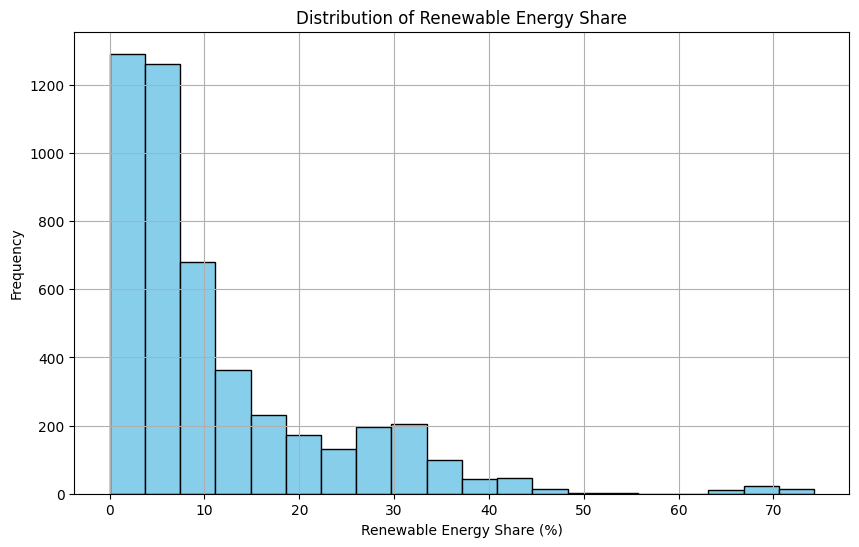

In [134]:
# Distribution of Renewable Energy Share
plt.figure(figsize=(10, 6))
plt.hist(data['RES'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Renewable Energy Share')
plt.xlabel('Renewable Energy Share (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The distribution appears to be right-skewed, meaning there are more countries with lower renewable energy shares than countries with higher shares.
The peak of the distribution falls around 10-20% renewable energy share.
There is a long tail to the right, indicating that a few countries have very high renewable energy shares (above 60%).

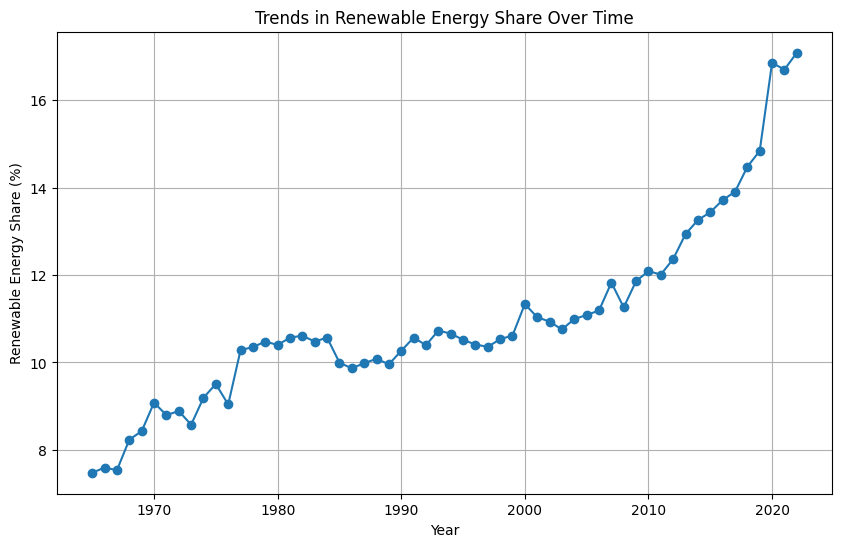

In [135]:
# Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(data.groupby('Year')['RES'].mean(), marker='o', linestyle='-')
plt.title('Trends in Renewable Energy Share Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.grid(True)
plt.show()

The overall trend shows a **positive and steady increase** in renewable energy share over time.
The rate of increase appears to be **slightly accelerating** in recent years.
There are some **fluctuations** in the trend, but the overall upward trajectory is clear.

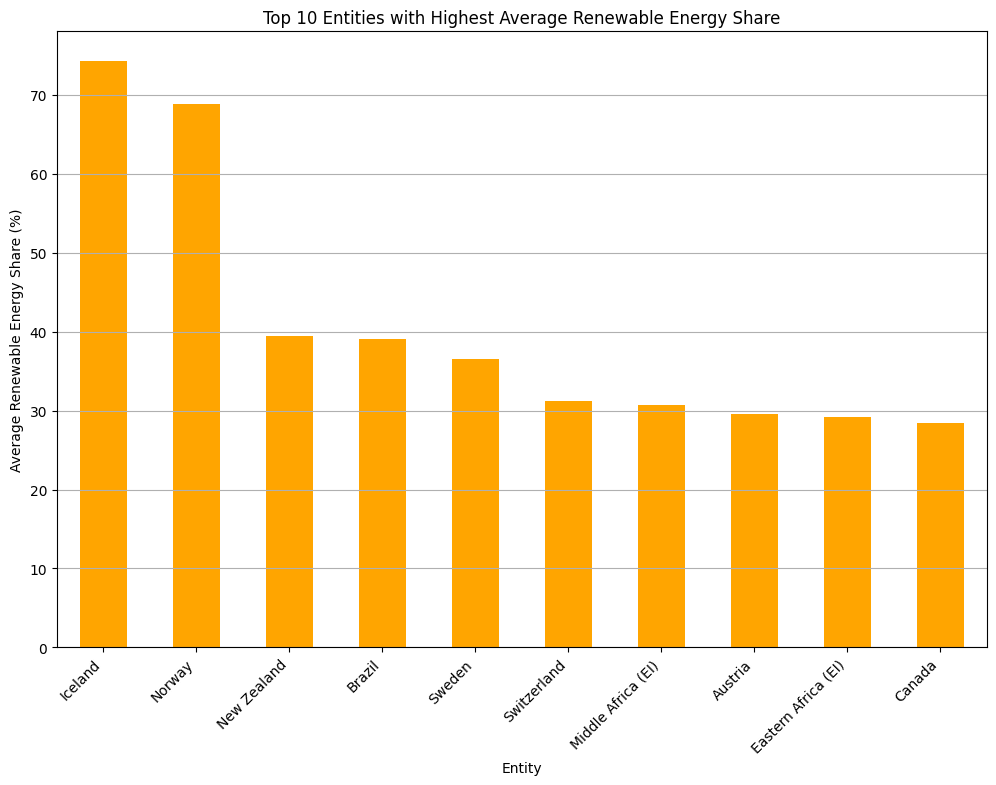

In [136]:
# Comparison Across Entities
plt.figure(figsize=(12, 8))
top_entities = data.groupby('Entity')['RES'].mean().sort_values(ascending=False).head(10)
top_entities.plot(kind='bar', color='orange')
plt.title('Top 10 Entities with Highest Average Renewable Energy Share')
plt.xlabel('Entity')
plt.ylabel('Average Renewable Energy Share (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

The chart clearly shows that Iceland, Norway, and New Zealand have the highest average RES among the top 10 entities, all exceeding 60%.
There is a significant drop in RES share after the top 3 entities, with Brazil, Sweden, and Switzerland having values between 40% and 50%.
The remaining entities have RES shares below 40%, with Middle Africa (EI) having the lowest share at around 12%.

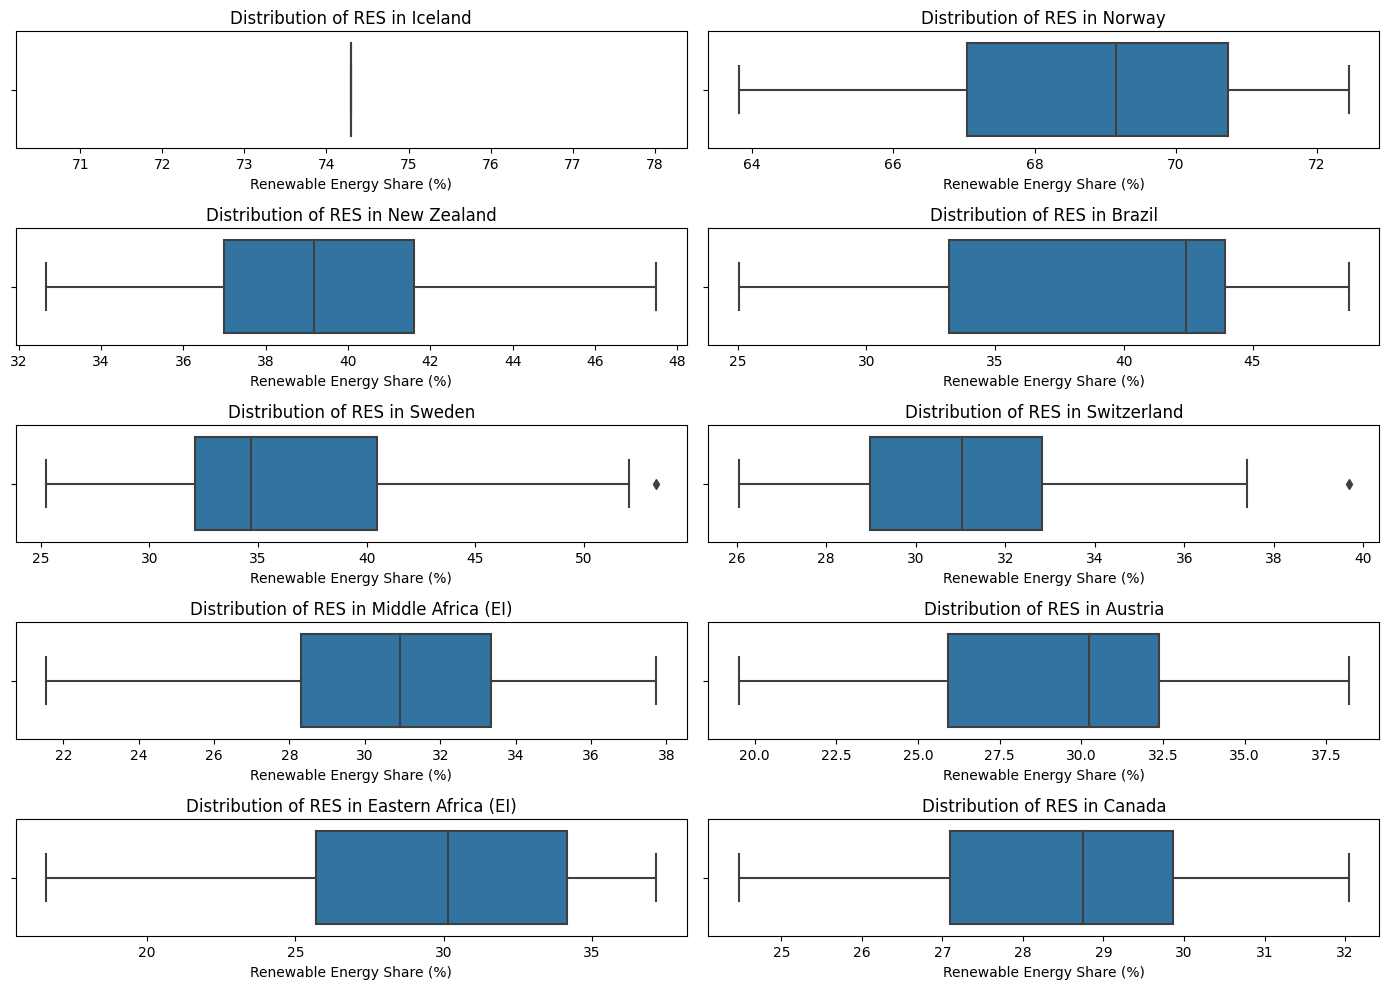

In [137]:
# Extract top 10 entities with highest average RES
top_10_entities = data.groupby('Entity')['RES'].mean().sort_values(ascending=False).head(10).index.tolist()

# Filter data for top 10 entities
top_10_data = data[data['Entity'].isin(top_10_entities)]

# Create a boxplot or violin plot for each entity
plt.figure(figsize=(14, 10))
for i, entity in enumerate(top_10_entities, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=top_10_data[top_10_data['Entity'] == entity], x='RES')
    plt.title(f'Distribution of RES in {entity}')
    plt.xlabel('Renewable Energy Share (%)')
plt.tight_layout()
plt.show()


In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose

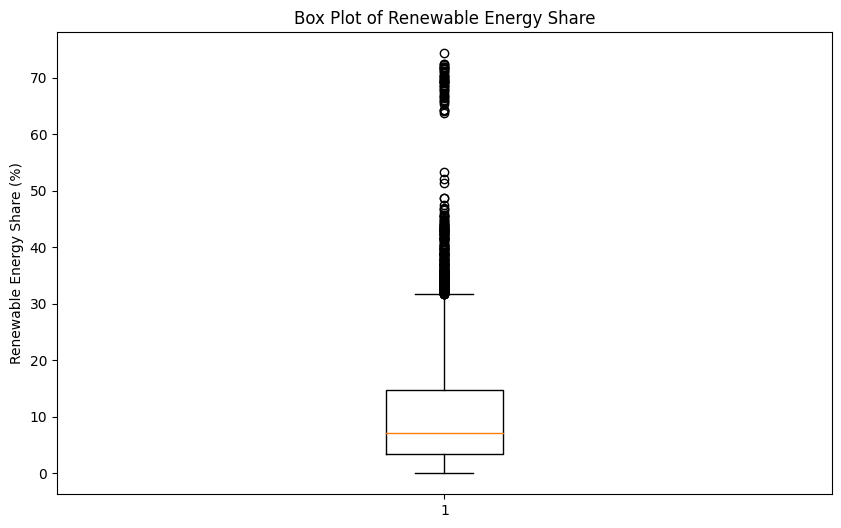

In [139]:
# Box Plot of Renewable Energy Share
plt.figure(figsize=(10, 6))
plt.boxplot(data['RES'])
plt.title('Box Plot of Renewable Energy Share')
plt.ylabel('Renewable Energy Share (%)')
plt.show()

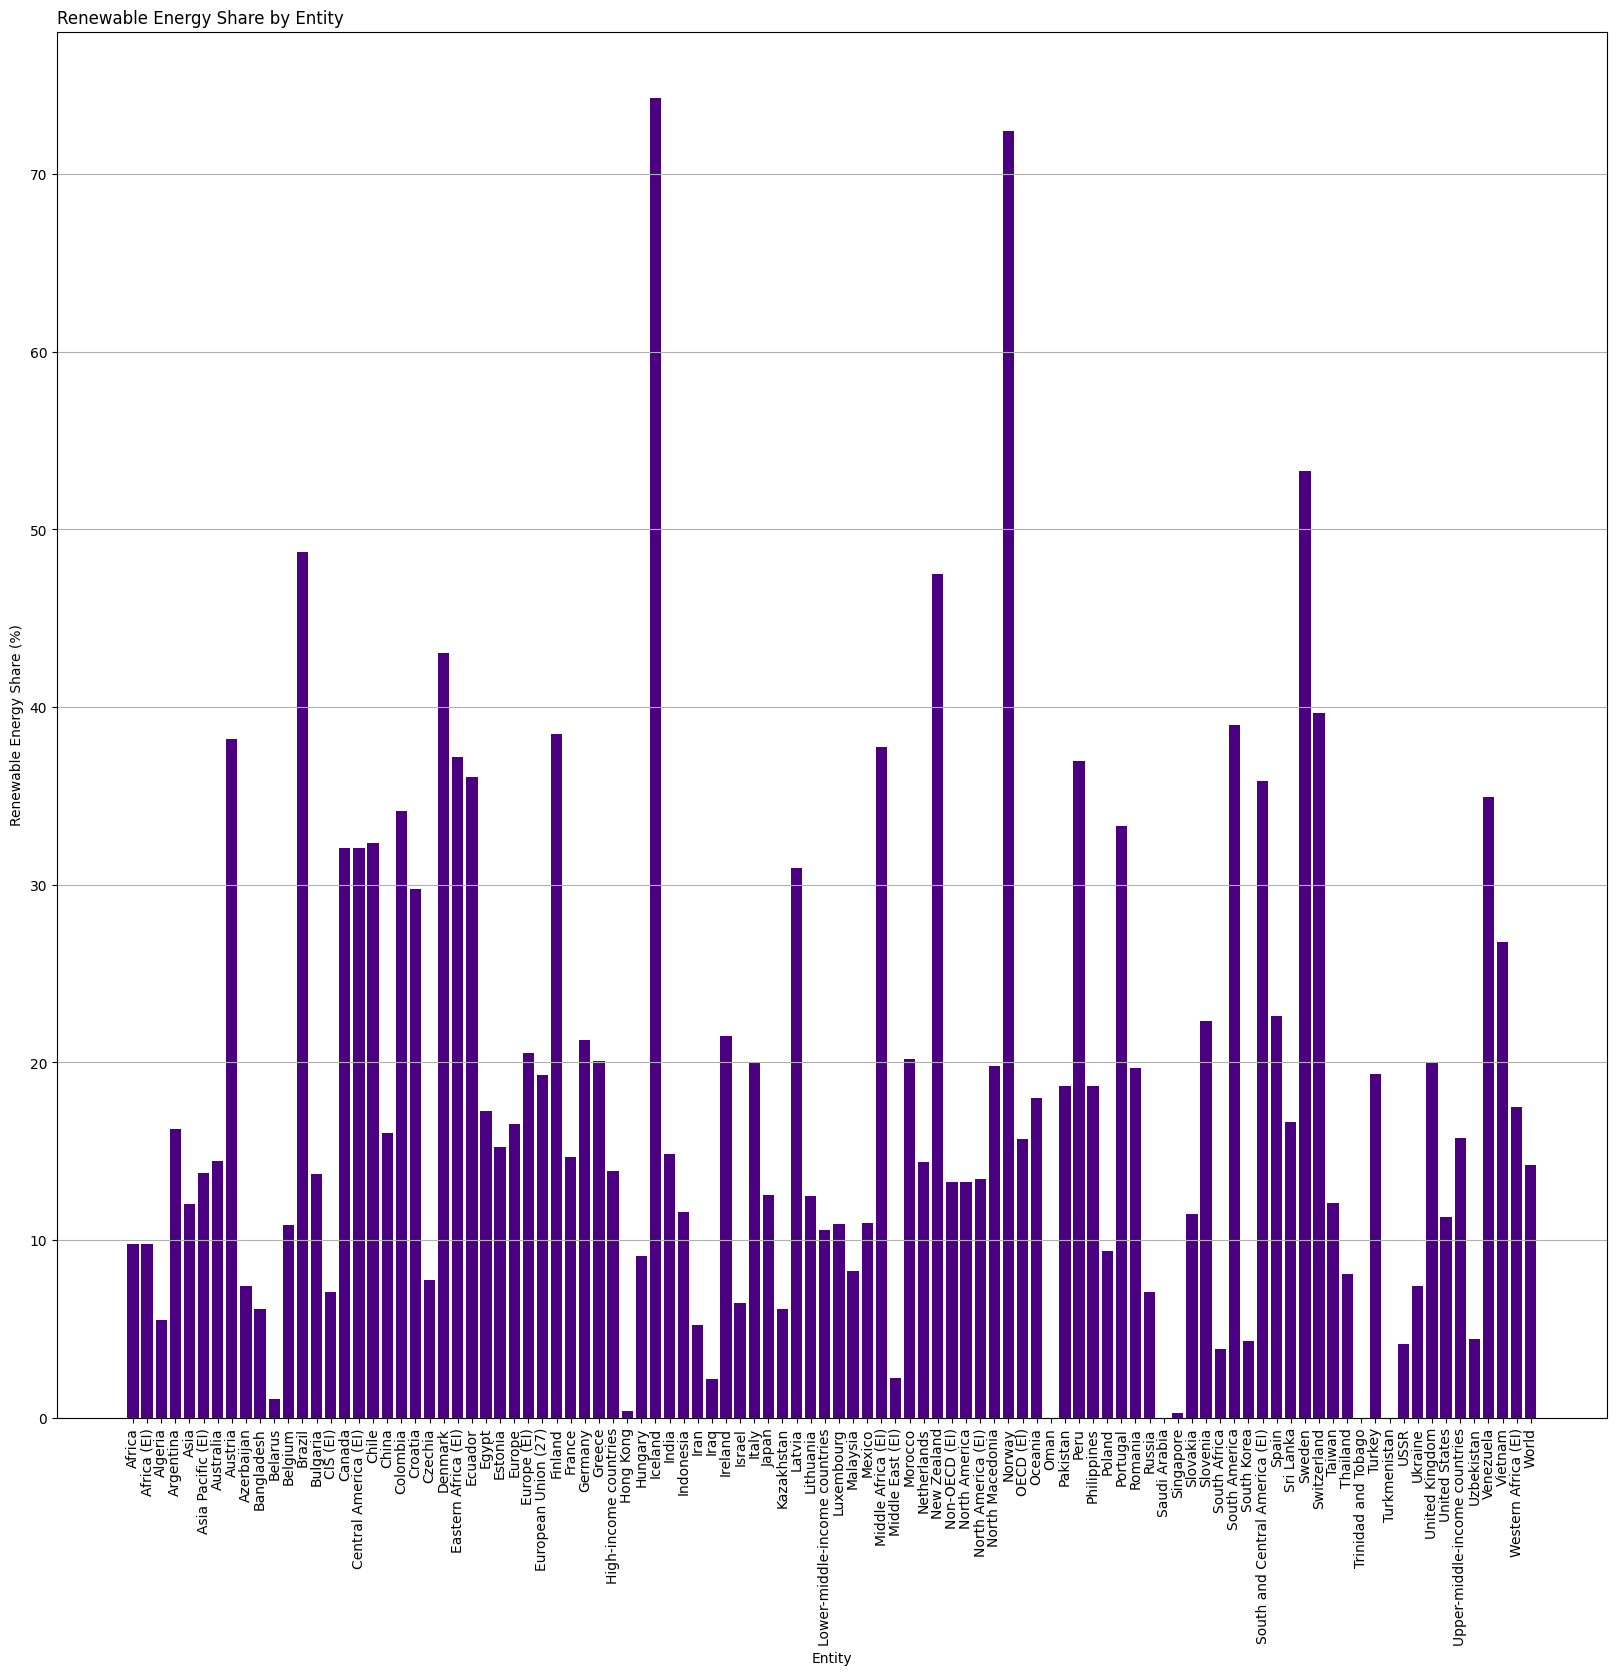

In [140]:
plt.figure(figsize=(20, 18))
plt.bar(data['Entity'], data['RES'], color='indigo') 
plt.title('Renewable Energy Share by Entity', loc='left')
plt.xlabel('Entity')
plt.ylabel('Renewable Energy Share (%)')
plt.xticks(rotation=90)  
plt.grid(axis='y')
plt.show()


# Regional trends

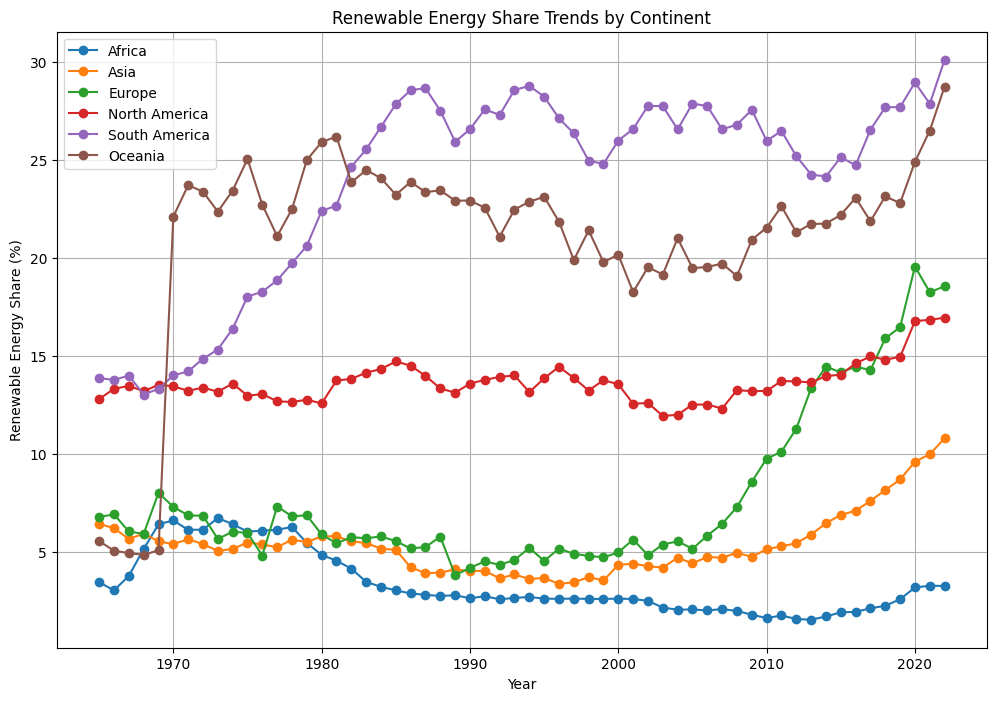

In [141]:
# Define regions or groups (continents)
continents = {
    'Africa': ['Algeria', 'Angola', 'Egypt', 'Nigeria', 'South Africa', ...],  # List of African countries
    'Asia': ['China', 'India', 'Japan', 'South Korea', 'Saudi Arabia', ...],     # List of Asian countries
    'Europe': ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', ...],    # List of European countries
    'North America': ['United States', 'Canada', 'Mexico', ...],                 # List of North American countries
    'South America': ['Brazil', 'Argentina', 'Colombia', 'Chile', ...],          # List of South American countries
    'Oceania': ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', ...]     # List of Oceanian countries
}

# Create separate trend lines for each continent
plt.figure(figsize=(12, 8))
for continent, countries in continents.items():
    continent_data = data[data['Entity'].isin(countries)]
    plt.plot(continent_data.groupby('Year')['RES'].mean(), label=continent, marker='o')

plt.title('Renewable Energy Share Trends by Continent')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.legend()
plt.grid(True)
plt.show()


# AnaLysis

**High RES Share:**

Countries from Scandinavia (Iceland, Norway, Sweden) stand out with the highest renewable energy share. This confirms previous trends and potentially points to strong renewable energy policies and resource availability in these regions.

**Low RES Share:**

A majority of countries have less than 40% renewable energy share. This highlights the global picture of varying progress in clean energy adoption.

**Contrasting Regions:**

Middle Africa apparently has the highest overall percentage in renewable energy share, which needs further confirmation as it seems counterintuitive compared to previous reports. Double-check the data or investigate specific countries driving this finding.
The Middle East has the lowest average percentage, aligning with expectations due to their reliance on fossil fuels.


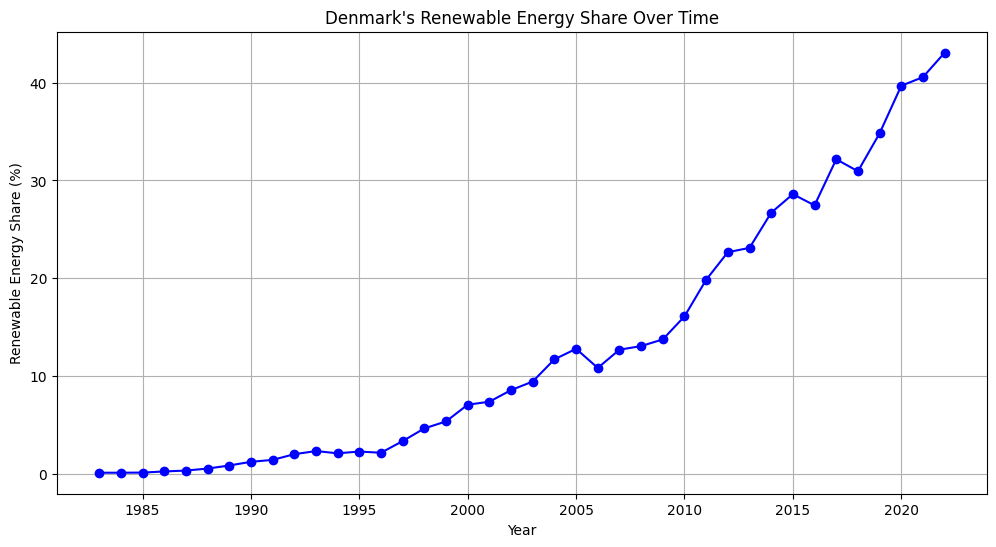

In [142]:
# Filter data for Denmark
denmark_data = data[data['Entity'] == 'Denmark']

# Plot Denmark's RES share trend
plt.figure(figsize=(12, 6))
plt.plot(denmark_data['Year'], denmark_data['RES'], marker='o', color='blue')
plt.title("Denmark's Renewable Energy Share Over Time")
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.grid(True)
plt.show()


In [143]:
# Check data for Middle Africa
middle_africa_data = data[data['Entity'] == 'Middle Africa']
print("Data for Middle Africa:")
print(middle_africa_data)

# Check countries with zero RES share
zero_res_countries = data[data['RES'] == 0]
print("\nCountries with zero RES share:")
print(zero_res_countries)

Data for Middle Africa:
Empty DataFrame
Columns: [Entity, Year, RES]
Index: []

Countries with zero RES share:
            Entity       Year  RES
1387       Estonia 1985-01-01  0.0
1388       Estonia 1986-01-01  0.0
1389       Estonia 1987-01-01  0.0
1390       Estonia 1988-01-01  0.0
1391       Estonia 1989-01-01  0.0
...            ...        ...  ...
3672  Saudi Arabia 1995-01-01  0.0
3673  Saudi Arabia 1996-01-01  0.0
3674  Saudi Arabia 1997-01-01  0.0
3675  Saudi Arabia 1998-01-01  0.0
3676  Saudi Arabia 1999-01-01  0.0

[67 rows x 3 columns]


In [144]:
# Calculate average RES for each entity
average_res_by_entity = data.groupby('Entity')['RES'].mean().sort_values()

# Get the top 10 entities with the lowest average RES
top_10_lowest_res = average_res_by_entity.head(10)

# Print the top 10 entities with the lowest average RES
print("Top 10 entities with the lowest average RES:")
print(top_10_lowest_res)


Top 10 entities with the lowest average RES:
Entity
Oman                   0.000000
Saudi Arabia           0.000000
Trinidad and Tobago    0.006915
Turkmenistan           0.007291
Hong Kong              0.100337
Singapore              0.209595
Belarus                0.213776
Israel                 0.699246
South Africa           0.719222
Algeria                0.926190
Name: RES, dtype: float64


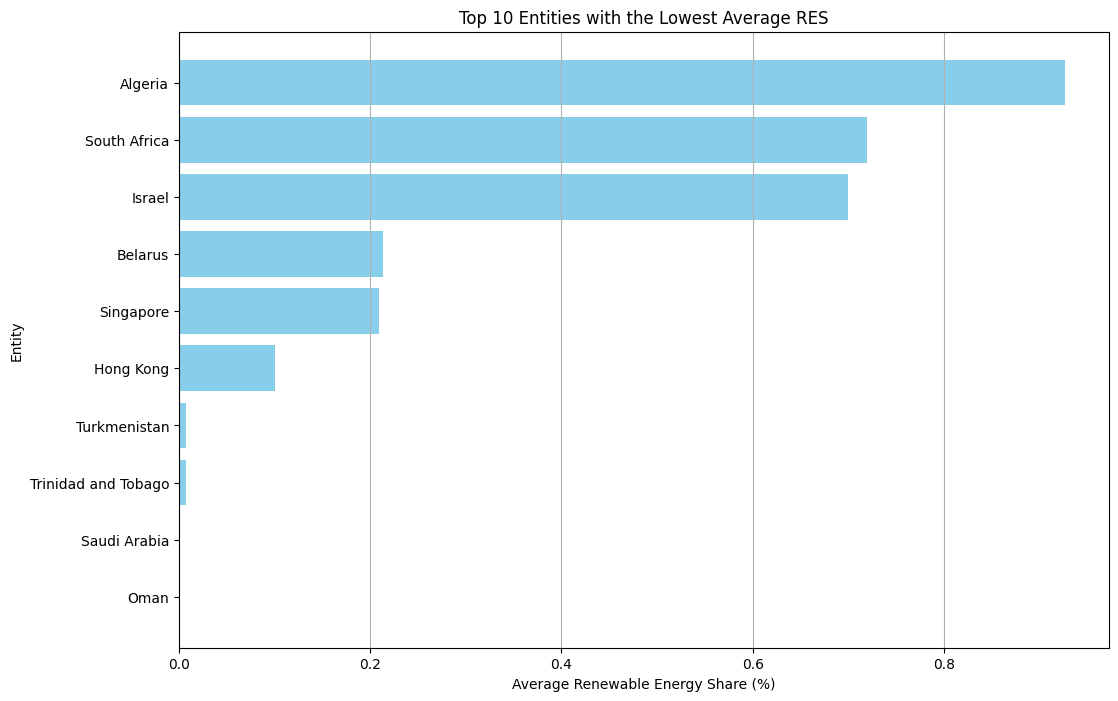

In [145]:
# Data for the top 10 entities with the lowest average RES
entities = top_10_lowest_res.index
average_res = top_10_lowest_res.values

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(entities, average_res, color='skyblue')
plt.xlabel('Average Renewable Energy Share (%)')
plt.ylabel('Entity')
plt.title('Top 10 Entities with the Lowest Average RES')
plt.grid(axis='x')
plt.show()


**Entity-wise Analysis**

In [146]:
entity_res_mean = data.groupby('Entity')['RES'].mean().sort_values(ascending=False)
max_res_entity = entity_res_mean.idxmax()
min_res_entity = entity_res_mean.idxmin()
print(f"Entity with highest average RES: {max_res_entity}")
print(f"Entity with lowest average RES: {min_res_entity}")


Entity with highest average RES: Iceland
Entity with lowest average RES: Oman


**Max and Min RES Share**

In [147]:
max_res_year = data.loc[data['RES'].idxmax()]
min_res_year = data.loc[data['RES'].idxmin()]
print(f"Year with highest RES share: {max_res_year['Year'].year}, Entity: {max_res_year['Entity']}, RES share: {max_res_year['RES']}")
print(f"Year with lowest RES share: {min_res_year['Year'].year}, Entity: {min_res_year['Entity']}, RES share: {min_res_year['RES']}")


Year with highest RES share: 2007, Entity: Iceland, RES share: 74.30169
Year with lowest RES share: 1985, Entity: Estonia, RES share: 0.0


In [148]:
entities_with_zero_share = data[data['RES'] == 0]['Entity'].unique()
print("Entities with zero renewable energy share:")
print(entities_with_zero_share)


Entities with zero renewable energy share:
['Estonia' 'Hong Kong' 'Israel' 'Netherlands' 'Oman' 'Saudi Arabia']


**Temporal Variability**

In [149]:
temporal_variability = data.groupby('Entity')['RES'].std().sort_values(ascending=False)
print("Temporal Variability (Standard Deviation) in RES Share:")
print(temporal_variability)

Temporal Variability (Standard Deviation) in RES Share:
Entity
Denmark                           13.131949
South America                      8.201419
Venezuela                          7.950485
South and Central America (EI)     7.697652
Portugal                           7.459348
                                    ...    
Trinidad and Tobago                0.001416
Saudi Arabia                       0.000000
Oman                               0.000000
Iceland                                 NaN
Sri Lanka                               NaN
Name: RES, Length: 100, dtype: float64


**Long-term Growth Rates**

In [150]:
def calculate_cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / num_periods) - 1

cagr = calculate_cagr(data[data['Year'] == data['Year'].min()]['RES'].mean(),
                      data[data['Year'] == data['Year'].max()]['RES'].mean(),
                      len(data['Year'].unique()) - 1)
print(f"Compound Annual Growth Rate (CAGR) of RES share: {cagr:.2%}")


Compound Annual Growth Rate (CAGR) of RES share: 1.46%
